# Julia by Example

### Exercise 6 
- Plotting time series data for $\alpha  = 0.0$, $0.8$, and $0.98$.

In [11]:
using Plots
function timeseriesplot(n, α)
ϵ = randn(n)
x=zeros(n)
for i in 2:n
    x[i]= α * x[i-1] + ϵ[i]
end
gr(fmt=:png);
plot!(x, label="alpha = $α")  
end


timeseriesplot (generic function with 1 method)

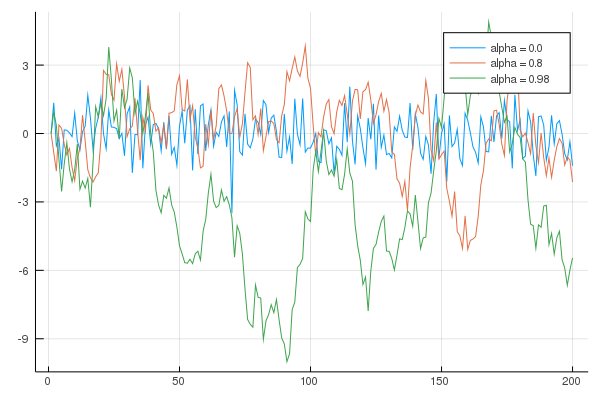

In [12]:
timeseriesplot(200, 0.0)
timeseriesplot(200, 0.8)
timeseriesplot(200, 0.98)

### Exercise 7
- First passage time function for random walk, histogram


In [13]:
#generating data for random walk process
function randomwalkdata(α, tmax)
    σ=0.2
    z=ones(tmax)
    ϵ=randn(tmax)
for t in 2:tmax
    z[t]=α*z[t-1]+σ*ϵ[t]
        
end
    z[tmax]=0
return(z)
end

randomwalkdata (generic function with 1 method)

In [14]:
#generating first-passage time function
function firstpass(α, a, tmax)    
z=randomwalkdata(α, tmax)
A=Inf
    for i in 1:tmax
    if z[i]<=a
        A = i
            return(A)
        end
    end
end

firstpass (generic function with 1 method)

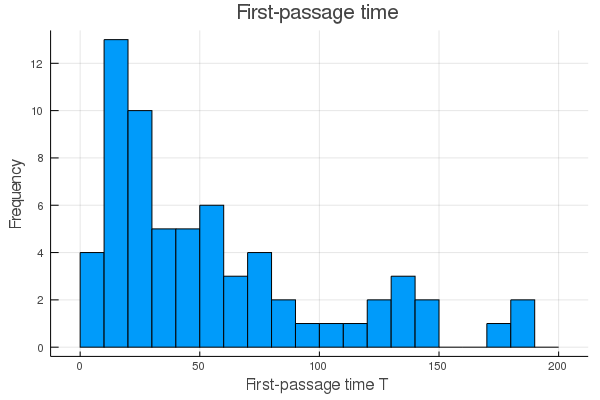

In [22]:
#generating data from simulations and histogram
using Plots
fp = [firstpass(1.0, 0.0, 200) for i in 1:100]
histogram(fp,  bins=0:10:200, legend=false, title="First-passage time", xlabel = "First-passage time T", ylabel="Frequency")

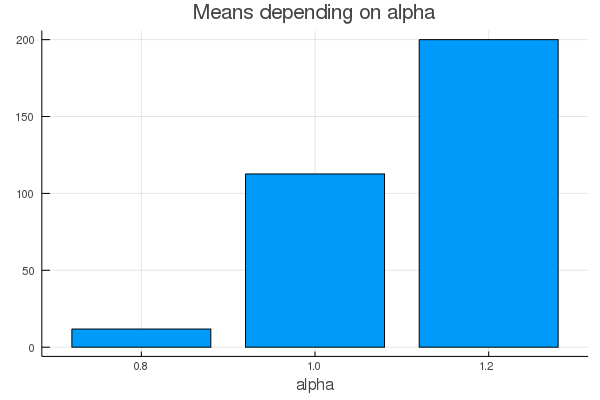

In [64]:
#simulations for different alpha
using Statistics
fpa = [firstpass(0.8, 0.0, 200) for i in 1:100]
fpb = [firstpass(1.0, 0.0, 200) for i in 1:100]
fpc = [firstpass(1.2, 0.0, 200) for i in 1:100]

firstalpha=mean(fpa)
secondalpha = mean(fpb)
thirdalpha = mean(fpc)

newfp = [firstalpha, secondalpha, thirdalpha]
α = [0.8, 1.0, 1.2]
bar(α, newfp, title="Means depending on alpha", xaxis = α, xlabel="alpha", legend=false)

### Exercise 8(a)
- Fixed point to implement Newton's method

In [53]:
#using LinearAlgebra,
function fixedpointmap(x_0, f, f_prime,tolerance = 1.0E-8, maxiter=1000)
normdiff = Inf
iter = 1
x_old=x_0
      while normdiff>tolerance && iter<= maxiter
        x_new = x_old -f(x_old)/f_prime(x_old)
        normdiff =norm(x_new-x_old)
        x_old=x_new
        iter+=1
    end
       return(value = x_old,normdiff=normdiff, iter=iter  )
    end

fixedpointmap (generic function with 4 methods)

In [55]:
using LinearAlgebra
x_0 = 0.0
f(x)=(x-1)^(3)
f_prime(x) = 3*(x-1)^2
sol = fixedpointmap(x_0, f, f_prime)
println("Fixed point = $(sol.value), and |f(x) - x| = $(sol.normdiff) in $(sol.iter) iterations")

Fixed point = 0.9999999821357577, and |f(x) - x| = 8.932121153826245e-9 in 45 iterations


In [56]:
x_0 = 0.1
f(x)=2*x^2-8
f_prime(x) = 4*x
sol = fixedpointmap(x_0, f, f_prime)
println("Fixed point = $(sol.value), and |f(x) - x| = $(sol.normdiff) in $(sol.iter) iterations")

Fixed point = 2.0, and |f(x) - x| = 2.984279490192421e-11 in 10 iterations


### Exercise 8(b)
- Fixed point to implement Newton's method with auto-differentiation

In [63]:
using ForwardDiff
function fixedpointmap(f, x_0, tolerance= 1.0E-8, maxiter= 1000)
normdiff = Inf
iter = 1
x_old=x_0
fprime(x) = ForwardDiff.derivative(f, x)
      while normdiff>tolerance && iter<= maxiter
        x_new = x_old -f(x_old)/f_prime(x_old)
        normdiff =norm(x_new-x_old)
        x_old=x_new
        iter+=1
    end
      return(value = x_old,normdiff=normdiff, iter=iter  )
    end

fixedpointmap (generic function with 5 methods)

In [62]:
x_0 = 0.1
f(x)=2*x^2-8
sol = fixedpointmap(f, x_0)
println("Fixed point = $(sol.value), and |f(x) - x| = $(sol.normdiff) in $(sol.iter) iterations")

Fixed point = 2.0, and |f(x) - x| = 2.984279490192421e-11 in 10 iterations


# Julia Essentials

### Exercise 5
- Linear approximation

In [26]:
function linapprox(f; range, x)
     point = step(range) * ÷(x - range[1], step(range))
    
    u, v = point - step(range), point

    return f(u) + (x - u) * (f(v) - f(u)) / (v - u)
end

linapprox (generic function with 2 methods)

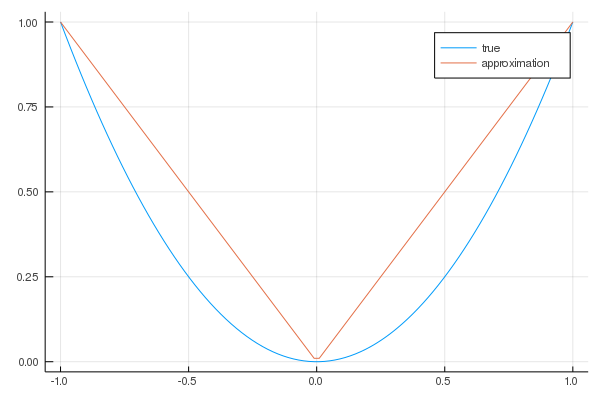

In [27]:
f(x) = x^2
g(x) = linapprox(f; range = -1:1:2, x=x)

x_grid = range(-1.0, 1.0, length = 100)
y_vals = f.(x_grid)
y = g.(x_grid)
using Plots
plot(x_grid, y_vals, label = "true")
plot!(x_grid, y, label = "approximation")